# Homework5: Denoising score matching

## Task 1: Theory (4pt)


### Problem 1: Gaussian Diffusion (2pt)

In the course we have discussed two types of gaussian diffusions:
- $\mathbf{x}_t = \mathbf{x}_0 + \sigma_t \cdot \boldsymbol{\epsilon}$ - score-based models,
- $\mathbf{x}_t = \sqrt{1 - \beta_t} \cdot \mathbf{x}_{t-1} + \sqrt{\beta_t} \cdot \boldsymbol{\epsilon}$ - diffusion models.

One may ask, why we do not consider the more general diffusion models. It was the idea of the paper [Variational Diffusion Models](https://arxiv.org/abs/2107.00630).

Let consider the diffusion of the form
$$
    \mathbf{x}_t = \alpha_t \cdot \mathbf{x}_0 + \sigma_t \cdot \boldsymbol{\epsilon}, \quad \mathbf{x}_t \sim q(\mathbf{x}_t | \mathbf{x}_0) = \mathcal{N}(\alpha_t \cdot \mathbf{x}_0, \sigma_t^2 \cdot \mathbf{I}).
$$

1) Show that if the variance of $\mathbf{x}_t$ equals to the variance of $\mathbf{x}_0$ then we came to the standard diffusion (in this case $\alpha_t^2 = 1 - \sigma_t^2$). That is why the standard diffusion is called **Variance Preserving**.

2) Find the distribution $q(\mathbf{x}_t | \mathbf{x}_s)$ for $s < t$ (you have to derive the formulas for mean and variance).

#### Решение
##### Пункт 1
Распишем дисперсию:
$$
    \operatorname{Var} \mathbf{x}_t = \operatorname{Var} (\alpha_t \mathbf{x}_0 + \sigma_t \boldsymbol{\epsilon}) = \alpha_t^2 \operatorname{Var} \mathbf{x}_0 + \sigma_t^2 \operatorname{Var} \boldsymbol{\epsilon}
$$
Откуда
$$
(\alpha_t^2 - 1) \operatorname{Var} \mathbf{x}_0 = -\sigma_t^2
$$
Учитывая $\operatorname{Var} \boldsymbol{\epsilon} = $ и предполагая нормированность данных $\operatorname{Var} \mathbf{x}_0 = 1$ получаем:
$$
\alpha_t^2 + \sigma_t^2 = 1 \Rightarrow \boxed{\alpha_t^2 = 1 - \sigma_t^2}
$$
##### Пункт 2
Запишем выражения для $x_t, x_s$:
$$
x_t = \alpha_t \mathbf{x}_0 + \sigma_t \boldsymbol{\epsilon}_t, \quad x_s = \alpha_s \mathbf{x}_0 + \sigma_s \boldsymbol{\epsilon}_s
$$
Откуда
$$
\mathbf{x}_0 = \frac{\mathbf{x}_s - \sigma_s \boldsymbol{\epsilon}_s}{\alpha_s}
$$
Подставляя в $x_t$ получаем
$$
\mathbf{x} = \alpha_t \frac{\mathbf{x}_s - \sigma_s \boldsymbol{\epsilon}_s}{\alpha_s} = \frac{\alpha_t}{\alpha_s} \mathbf{x}_s - \frac{\alpha_t}{\alpha_s} \sigma_s \boldsymbol{\epsilon}_s + \sigma_t \boldsymbol{\epsilon}_t = \frac{\alpha_t}{\alpha_s} \mathbf{x}_s + \sqrt {(\frac{\alpha_t \sigma_s}{\alpha_s})^2 + \sigma_t^2} \boldsymbol{\epsilon}
$$
Таким образом,
$$
q(x_t | x_s) = \mathcal{N} \left(\frac{\alpha_t}{\alpha_s} \cdot \mathbf{x}_s, \sqrt {(\frac{\alpha_t \sigma_s}{\alpha_s})^2 + \sigma_t^2} \cdot \mathbf{I} \right)

### Problem 2: Implicit score matching (2pt)

We have discussed score matching task at Lecture 9. The objective of score matching is
$$
    \frac{1}{2} \mathbb{E}_{\pi}\bigl\| \mathbf{s}_{\boldsymbol{\theta}}(\mathbf{x}) - \nabla_\mathbf{x} \log \pi(\mathbf{x}) \bigr\|^2_2 \rightarrow \min_{\boldsymbol{\theta}}.
$$

And we have already known one possible solution for this task. It is denoising score matching.

Here our goal is to derive one more way to solve the initial score matching problem. It is called **implicit score matching**.

Let consider 1-d case ($x \in \mathbb{R}$).
Prove that
$$
\frac{1}{2} \mathbb{E}_{\pi}\bigl\| s_{\boldsymbol{\theta}}(x) - \nabla_x \log \pi(x) \bigr\|^2_2 = \mathbb{E}_{\pi}\left[ \frac{1}{2}s^2_{\boldsymbol{\theta}}(x) + \nabla_{x} s_{\boldsymbol{\theta}}(x) \right] + \text{const}.
$$

- **Q:** Why is the expression at the right hand side better than the left one? **A:** It is better because we do not have the term with the unknown distribution $\pi(x)$.

- **Q:** Why do we not use this expression instead of denoising score matching? **A:** In this expression we have term $\nabla_{x} s_{\boldsymbol{\theta}}(x) = \nabla^2_{x} \log p(x | \boldsymbol{\theta})$. And it is difficult to work with the second derivates.

- **Q:** Why do we consider only 1-d case? **A:** It is very straightforward to generalize this formula to the multidimensional case, but the derivation contains much more formulas.

### Решение
#### Лемма
$$
\int_{-\infty}^{\infty} p(x) \nabla_x \log p(x) f(x)  \, dx = - \int_{-\infty}^{\infty} p(x) \nabla_x f(x) \, dx
$$
**Доказательство**
$$
\int_{-\infty}^{\infty} p(x) \nabla_x \log p(x) f(x)  \, dx = \int_{-\infty}^{\infty} p(x) \frac{\nabla_x p(x)}{p(x)} f(x)  \, dx = \int_{-\infty}^{\infty} \nabla_x p(x) f(x)  \, dx = \\ = p(x) f(x) \Big|_{-\infty}^{+\infty} - \int_{-\infty}^{\infty}p(x)  \nabla_x  f(x)  \, dx = \Big\{ p(\pm \infty) = 0\Big\} = - \int_{-\infty}^{\infty} p(x) \nabla_x f(x) \, dx
$$
#### Доказательство задачи
$$
\begin{align*}
\frac{1}{2} \mathbb{E}_{\pi} \| s_\theta (x) - \nabla_x \log \pi(x) \|_2^2 
&= \frac{1}{2} \int_{-\infty}^{+\infty} \pi(x) \Big( s_\theta^2 (x) - 2 s_\theta (x) \nabla_x \log \pi(x) + (\nabla_x \log \pi(x))^2 \Big) \, dx \\
&= \frac{1}{2} \int_{-\infty}^{+\infty} \pi(x) s_\theta^2 (x) \, dx+ \frac{1}{2} \int_{-\infty}^{+\infty} \pi(x) (\nabla_x \log \pi(x))^2 \, dx - \int_{-\infty}^{+\infty} \pi(x) s_\theta (x) \nabla_x \log \pi(x) \, dx \\
&= \frac{1}{2} \mathbb{E}_{\pi} s_\theta^2 (x) + \text{const} + \int_{-\infty}^{+\infty} \pi(x) \nabla s_\theta (x) \, dx \\
&= \mathbb{E}_{\pi}\left[ \frac{1}{2}s^2_{\boldsymbol{\theta}}(x) + \nabla_{x} s_{\boldsymbol{\theta}}(x) \right] + \text{const}.
\end{align*}
$$

In [48]:
# # !pip install --upgrade --no-cache-dir gdown

# # COMMIT_HASH = "2180d8447bc1c62bf662505d73f60d3e0d7ff03c"
# # !if [ -d dgm_utils ]; then rm -Rf dgm_utils; fi
# !git clone https://github.com/r-isachenko/dgm_utils.git
# %cd dgm_utils
# !git checkout {COMMIT_HASH}
# !pip install ./
# %cd ./..
# !rm -Rf dgm_utils

In [49]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [50]:
import dgm_utils

In [92]:
from tqdm import tqdm
from typing import List, Tuple
import math
import matplotlib.pyplot as plt

import numpy as np
from sklearn.datasets import make_moons
from pathlib import Path

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data

DEVICE = "cuda:0" if torch.cuda.is_available() else "cpu"

## Task 2: Denoising score matching for 2D data (4 pts)

In this task you will implement the denoising score matching model to the 2D moons dataset.

Let's take a look at dataset samples.

In [159]:
def generate_moons_data(count: int) -> tuple:
    data, labels = make_moons(n_samples=count, noise=0.1)
    data = data.astype("float32")
    split = int(0.8 * count)
    train_data, test_data = data[:split], data[split:]
    train_labels, test_labels = labels[:split], labels[split:]
    return train_data, train_labels, test_data, test_labels

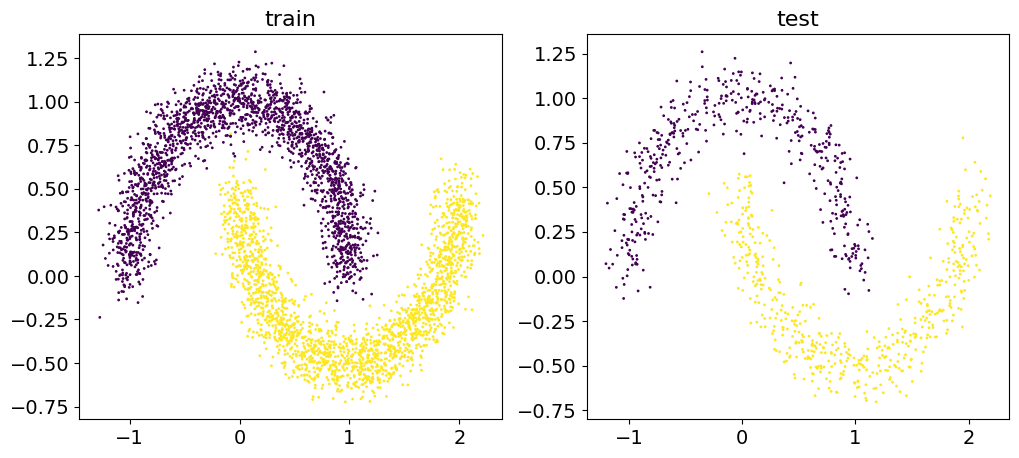

In [160]:
COUNT = 5000

train_data, train_labels, test_data, test_labels = generate_moons_data(COUNT)
dgm_utils.visualize_2d_data(train_data, test_data, train_labels, test_labels)

Let recall the theory of denoising score matching.

The idea is the following. We define the score function
$$
    \mathbf{s}_{\boldsymbol{\theta}}(\mathbf{x}) = \nabla_{\mathbf{x}}\log p(\mathbf{x}| \boldsymbol{\theta}).
$$

Then we minimize the Fisher divergence to obtain the score function:
$$
    D_F(\pi, p) = \frac{1}{2}\mathbb{E}_{\pi}\bigl\| \mathbf{s}_{\boldsymbol{\theta}}(\mathbf{x}) - \nabla_{\mathbf{x}} \log \pi(\mathbf{x}) \bigr\|^2_2 \rightarrow \min_{\boldsymbol{\theta}}
$$.

If we have the score function, we use the Langevin dynamics to sample from our model:
$$
    \mathbf{x}_{l + 1} = \mathbf{x}_l + \frac{\eta}{2} \cdot \nabla_{\mathbf{x}_l} \log p(\mathbf{x}_l | \boldsymbol{\theta}) + \sqrt{\eta} \cdot \boldsymbol{\epsilon}, \quad \boldsymbol{\epsilon} \sim \mathcal{N}(0, \mathbf{I}).
$$

But Fisher divergence is intractable and we use the noising procedure to get noised samples $\mathbf{x}_{\sigma} = \mathbf{x} + \sigma \cdot \boldsymbol{\epsilon}$.

Minimizing the Fisher divergence for the noisy samples is equivalent to the following objective:
$$
    \mathbb{E}_{q(\mathbf{x}_{\sigma})}\bigl\| \mathbf{s}_{\boldsymbol{\theta}, \sigma}(\mathbf{x}_{\sigma}) - \nabla_{\mathbf{x}_{\sigma}} \log q(\mathbf{x}_{\sigma}) \bigr\|^2_2 = \\
    = \mathbb{E}_{\pi(\mathbf{x})} \mathbb{E}_{q(\mathbf{x}_{\sigma} | \mathbf{x})}\bigl\| \mathbf{s}_{\boldsymbol{\theta}, \sigma}(\mathbf{x}_{\sigma}) - \nabla_{\mathbf{x}_{\sigma}} \log q(\mathbf{x}_{\sigma} | \mathbf{x}) \bigr\|^2_2 + \text{const}(\boldsymbol{\theta}).
$$

Here
$$
    \log q(\mathbf{x}_{\sigma} | \mathbf{x}) = - \frac{\mathbf{x}_{\sigma} - \mathbf{x}}{\sigma^2} = - \frac{\boldsymbol{\epsilon}}{\sigma}.
$$

Therefore, the objective of the denoising score matching is

$$
\mathbb{E}_{\pi(\mathbf{x})} \mathbb{E}_{q(\mathbf{x}_{\sigma} | \mathbf{x})}\bigl\| \mathbf{s}_{\boldsymbol{\theta}, \sigma}(\mathbf{x}_{\sigma}) + \frac{\boldsymbol{\epsilon}}{\sigma} \bigr\|^2_2 \rightarrow \min_{\boldsymbol{\theta}}.
$$

In [161]:
class DenoisingScoreMatcher(nn.Module):
    def __init__(
            self,
            score_model: nn.Module,
            input_shape: Tuple[int],
            sigma: float
        ):
        super().__init__()

        self.score_model = score_model
        self.input_shape = input_shape
        self.sigma = sigma

    @property
    def device(self):
        return next(self.parameters()).device

    def forward(self, x: torch.Tensor):
        # ====
        # your code
        # sample gaussian noise
        # perturb samples using the noise and sigma
        noise = torch.randn(size=(x.size(0), *self.input_shape)).to(x)
        noisy_x = x + noise * self.sigma
        # =====

        # calculate the score model
        s = self.score_model(noisy_x)

        # ====
        # your code
        # compute the loss
        # it is mse between score function and gradient of the normal distribution
        
        loss = (s + noise / self.sigma).pow(2)
        # loss = torch.nn.functional.mse_loss(s, -noise / self.sigma, reduction="none")
        
        # =====
        return loss

    def loss(self, x: torch.Tensor):
        return {"total_loss": self(x).mean(dim=0).sum()}

    def langevin_dynamics(self, x: torch.Tensor, num_steps: int, eta: float):
        # =====
        # your code
        # apply Langevin dynamics in for-cycle to the starting point x
        
        eta = torch.tensor(eta)
        eta_sqrt = torch.sqrt(eta)
        
        for _ in range(num_steps):
            x = x + eta / 2 * self.score_model(x) + eta_sqrt * torch.randn(size=(x.size(0), *self.input_shape)).to(x)
        
        # =====
        return x

    def sample(self, num_samples: int = 64, num_steps: int=100, eta: float = 0.01):
        with torch.no_grad():
            # we sample x_0 from U[-1, 1]
            x0 = 2. * torch.rand_like(torch.empty(num_samples, *self.input_shape)) - 1.
            x0 = x0.to(self.device)

            # run langevine dynamics
            x = self.langevin_dynamics(x0, num_steps=num_steps, eta=eta)
        return x


def test_denoiser_score_matcher():
    matcher = DenoisingScoreMatcher(
        score_model=nn.Linear(2, 2),
        input_shape=(2,),
        sigma=0.1
    )
    x = torch.rand(16, 2)
    assert x.size() == matcher(x).size(), matcher(x).size()
    loss = matcher.loss(x)["total_loss"]
    assert len(loss.size()) == 0
    assert list(matcher.sample(4).size()) == [4, 2]


test_denoiser_score_matcher()

That's all!

And now we are ready to train our model.

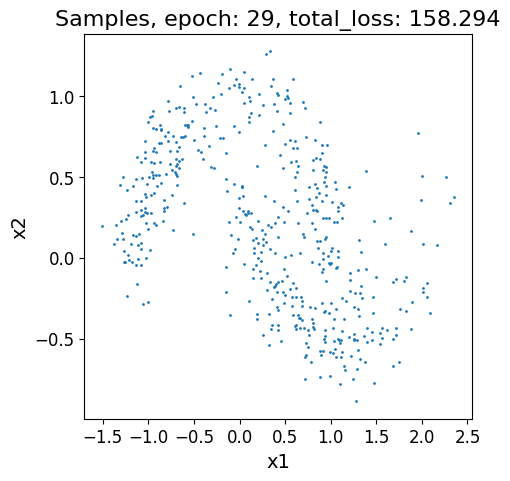

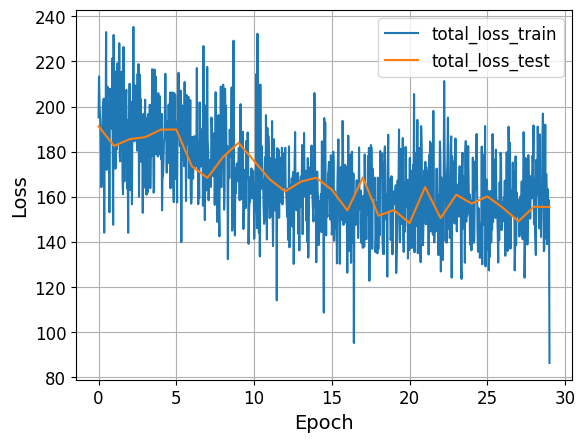

End of the training



In [162]:
# ====
# your code
# choose these parameters

BATCH_SIZE = 128  # any adequate value
EPOCHS = 30  # > 50
LR = 1e-2  # > 1e-3
HIDDEN_SIZE = 64  # > 32
SIGMA = 0.1  # 0.01 < x < 1.0
# ====

train_loader = data.DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = data.DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=True)

# ====
# your code
# define sequential model
# it is enough to use the sequence of Linear layers with activations
score_model = nn.Sequential(
    nn.Linear(2, HIDDEN_SIZE),
    nn.SiLU(),
    nn.Linear(HIDDEN_SIZE, HIDDEN_SIZE),
    nn.SiLU(),
    nn.Linear(HIDDEN_SIZE, HIDDEN_SIZE),
    nn.SiLU(),
    nn.Linear(HIDDEN_SIZE, HIDDEN_SIZE),
    nn.SiLU(),
    nn.Linear(HIDDEN_SIZE, 2)
)
# ====

matcher = DenoisingScoreMatcher(
    score_model=score_model, input_shape=(2,), sigma=SIGMA
)

# ====
# your code
# choose any optimizer/scheduler as you want
optimizer = torch.optim.Adam(matcher.parameters(), lr=LR)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.95)
# ====

dgm_utils.train_model(
    matcher,
    train_loader,
    test_loader,
    epochs=EPOCHS,
    optimizer=optimizer,
    scheduler=scheduler,
    device=DEVICE,
    n_samples=512,
)
print()

Let sample from our model. Experiment with number of steps and $\eta$ for Langevin dynamics.

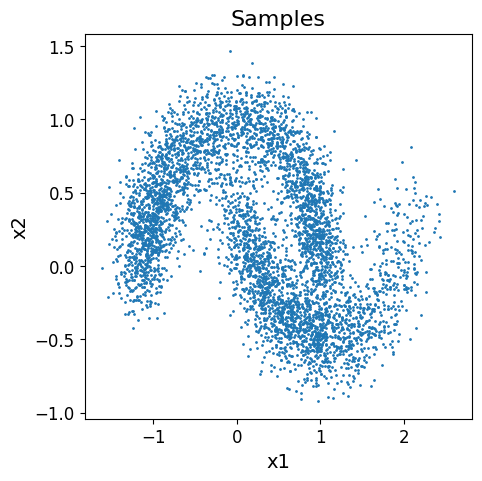

In [163]:
# ====
# your code
# choose these parameters
NUM_STEPS = 100
ETA = 0.01
# ====

torch.random.manual_seed(0)
samples = matcher.sample(num_samples=5000, num_steps=NUM_STEPS, eta=ETA).cpu()

dgm_utils.visualize_2d_samples(samples, title="Samples")

### Визуализируем как исходное распределение переходит в целевое

In [ ]:
from IPython.display import clear_output


min_val = 0.0001
max_val = 0.01
vals = torch.sigmoid(torch.linspace(-5, 4, 100)).numpy()
vals = (vals - vals.min()) / (vals.max() - vals.min()) * (max_val - min_val) + min_val
plt.plot(vals)

for i, eta in enumerate(vals):
    print(i)
    torch.random.manual_seed(0)
    samples = matcher.sample(num_samples=5000, num_steps=NUM_STEPS, eta=eta).cpu()
    dgm_utils.visualize_2d_samples(samples, title="Samples")
    path = Path(f"vis1/images/{i:04d}.png")
    path.parent.mkdir(parents=True, exist_ok=True)
    plt.xlim(-1.75, 2.25)
    plt.ylim(-2, 2)
    plt.savefig(path)
    clear_output()
clear_output()

In [ ]:
! /home/akkirr/.cargo/bin/gifski -o vis1/file.gif vis1/images/*.png

gifski created /home/akkirr/AI-Masters/2024-DGM-AIMasters-course/homeworks/vis1/file.gif

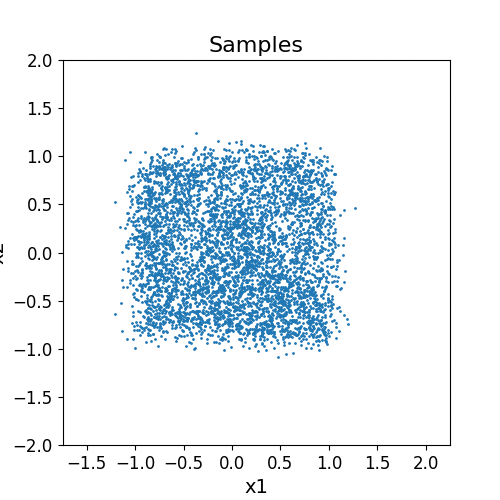

In [ ]:
from IPython.display import Image

Image(open('vis1/file.gif','rb').read())

### Визуализируем нормы градиентов поля

In [ ]:
x = np.arange(-1.75, 2.25, 0.05)
y = np.arange(-2, 2, 0.05)

x, y = np.meshgrid(x, y)
x = torch.tensor(x)
y = torch.tensor(y)

In [ ]:
reshaped = torch.dstack([x, y]).reshape(-1, 2).float()

In [ ]:
preds = matcher.score_model(reshaped.cuda()).detach().cpu()
preds = preds.norm(dim=-1)
preds = preds.reshape(80, 80)

(0.0, 80.0, 80.0, 0.0)

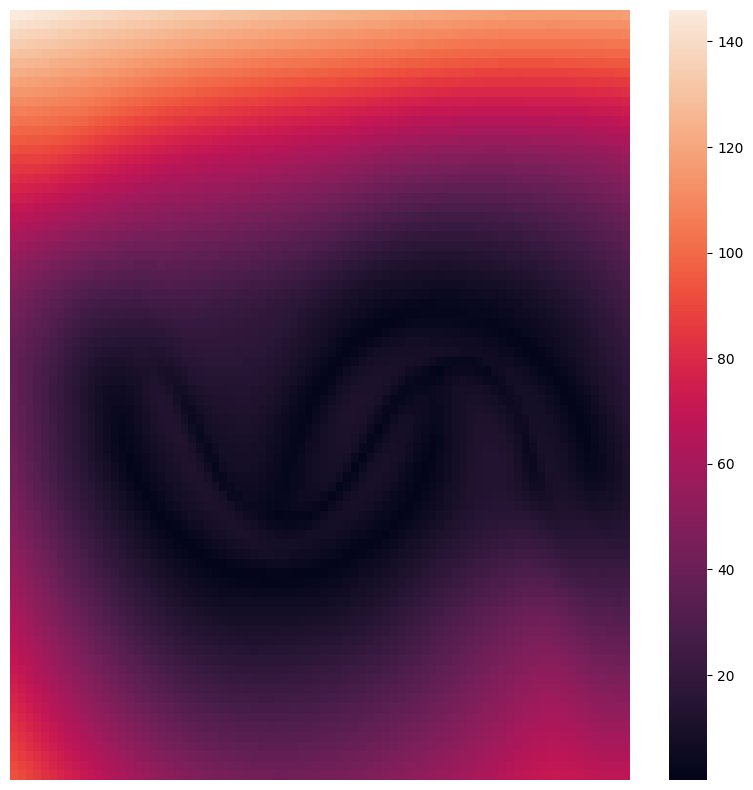

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.heatmap(preds)
plt.axis('off')

Любопытно, что посередине есть s-образная волна - зона неустойчивого равновесия

## Task 3: Noise Conditioned Score Network for MNIST (5 pts)

Now we try to extend our model to the NCSN. It means that we have to add multiple noise scales.

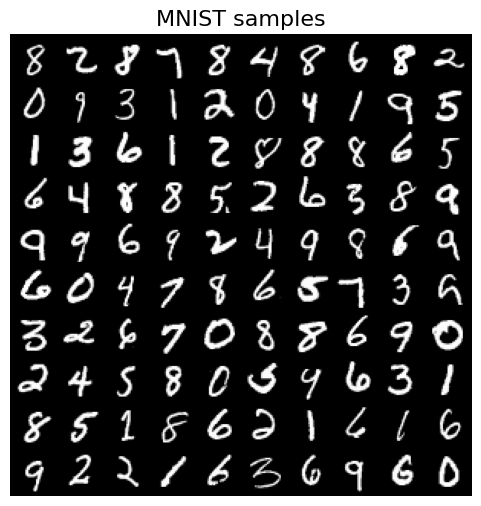

In [81]:
train_data, test_data = dgm_utils.load_dataset("mnist", flatten=False, binarize=False)
dgm_utils.visualize_images(train_data, "MNIST samples")

Here we will use the resnet-like architecture. But we encourage you to experiment with it.

The important thing here is the conditioning of the score model to noise. It means that the noise scale $\sigma$ have to be the input of the model. We will use embedding layer to make this conditioning.

In [82]:
def numel(model):
    total = 0
    for p in model.parameters():
        total += p.numel()
    return total

### Let's implement [custom unet architecture](https://huggingface.co/blog/annotated-diffusion) with weighted convs and self-attention

In [83]:
from einops import rearrange, reduce
from torch import nn, einsum
from functools import partial
from inspect import isfunction
from einops.layers.torch import Rearrange


def exists(x):
    return x is not None


def default(val, d):
    if exists(val):
        return val
    return d() if isfunction(d) else d

In [84]:
class WeightStandardizedConv2d(nn.Conv2d):
    """
    https://arxiv.org/abs/1903.10520
    weight standardization purportedly works synergistically with group normalization
    """

    def forward(self, x):
        eps = 1e-5 if x.dtype == torch.float32 else 1e-3

        weight = self.weight
        mean = reduce(weight, "o ... -> o 1 1 1", "mean")
        var = reduce(weight, "o ... -> o 1 1 1", partial(torch.var, unbiased=False))
        normalized_weight = (weight - mean) / (var + eps).rsqrt()

        return F.conv2d(
            x,
            normalized_weight,
            self.bias,
            self.stride,
            self.padding,
            self.dilation,
            self.groups,
        )


class Block(nn.Module):
    def __init__(self, dim, dim_out, groups=8):
        super().__init__()
        self.proj = WeightStandardizedConv2d(dim, dim_out, 3, padding=1)
        self.norm = nn.GroupNorm(groups, dim_out)
        self.act = nn.SiLU()

    def forward(self, x, scale_shift=None):
        x = self.proj(x)
        x = self.norm(x)

        if exists(scale_shift):
            scale, shift = scale_shift
            x = x * (scale + 1) + shift

        x = self.act(x)
        return x


class ConditionedResnetBlock(nn.Module):
    """https://arxiv.org/abs/1512.03385"""

    def __init__(self, dim, dim_out, num_embeddings, groups=8):
        super().__init__()

        self.embedding = nn.Embedding(
            num_embeddings=num_embeddings, embedding_dim=dim_out * 2
        )

        self.block1 = Block(dim, dim_out, groups=groups)
        self.block2 = Block(dim_out, dim_out, groups=groups)
        self.res_conv = nn.Conv2d(dim, dim_out, 1) if dim != dim_out else nn.Identity()

    def forward(self, x, y):
        time_emb = self.embedding(y)
        time_emb = rearrange(time_emb, "b c -> b c 1 1")
        scale_shift = time_emb.chunk(2, dim=1)

        h = self.block1(x, scale_shift=scale_shift)
        h = self.block2(h)
        return h + self.res_conv(x)

In [85]:
class Attention(nn.Module):
    def __init__(self, dim, heads=4, dim_head=32):
        super().__init__()
        self.scale = dim_head**-0.5
        self.heads = heads
        hidden_dim = dim_head * heads
        self.to_qkv = nn.Conv2d(dim, hidden_dim * 3, 1, bias=False)
        self.to_out = nn.Conv2d(hidden_dim, dim, 1)

    def forward(self, x):
        b, c, h, w = x.shape
        qkv = self.to_qkv(x).chunk(3, dim=1)
        q, k, v = map(
            lambda t: rearrange(t, "b (h c) x y -> b h c (x y)", h=self.heads), qkv
        )
        q = q * self.scale

        sim = einsum("b h d i, b h d j -> b h i j", q, k)
        sim = sim - sim.amax(dim=-1, keepdim=True).detach()
        attn = sim.softmax(dim=-1)

        out = einsum("b h i j, b h d j -> b h i d", attn, v)
        out = rearrange(out, "b h (x y) d -> b (h d) x y", x=h, y=w)
        return self.to_out(out)

class LinearAttention(nn.Module):
    def __init__(self, dim, heads=4, dim_head=32):
        super().__init__()
        self.scale = dim_head**-0.5
        self.heads = heads
        hidden_dim = dim_head * heads
        self.to_qkv = nn.Conv2d(dim, hidden_dim * 3, 1, bias=False)

        self.to_out = nn.Sequential(nn.Conv2d(hidden_dim, dim, 1), 
                                    nn.GroupNorm(1, dim))

    def forward(self, x):
        b, c, h, w = x.shape
        qkv = self.to_qkv(x).chunk(3, dim=1)
        q, k, v = map(
            lambda t: rearrange(t, "b (h c) x y -> b h c (x y)", h=self.heads), qkv
        )

        q = q.softmax(dim=-2)
        k = k.softmax(dim=-1)

        q = q * self.scale
        context = torch.einsum("b h d n, b h e n -> b h d e", k, v)

        out = torch.einsum("b h d e, b h d n -> b h e n", context, q)
        out = rearrange(out, "b h c (x y) -> b (h c) x y", h=self.heads, x=h, y=w)
        return self.to_out(out)

In [86]:
class PreNorm(nn.Module):
    def __init__(self, dim, fn):
        super().__init__()
        self.fn = fn
        self.norm = nn.GroupNorm(1, dim)

    def forward(self, x):
        x = self.norm(x)
        return self.fn(x)
    
class Residual(nn.Module):
    def __init__(self, fn):
        super().__init__()
        self.fn = fn

    def forward(self, x, *args, **kwargs):
        return self.fn(x, *args, **kwargs) + x
    
def Upsample(dim, dim_out=None):
    return nn.Sequential(
        nn.Upsample(scale_factor=2, mode="nearest"),
        nn.Conv2d(dim, default(dim_out, dim), 3, padding=1),
    )


def Downsample(dim, dim_out=None):
    # No More Strided Convolutions or Pooling
    return nn.Sequential(
        Rearrange("b c (h p1) (w p2) -> b (c p1 p2) h w", p1=2, p2=2),
        nn.Conv2d(dim * 4, default(dim_out, dim), 1),
    )


In [87]:
class Unet(nn.Module):
    def __init__(
        self,
        dim,
        init_dim=None,
        out_dim=None,
        dim_mults=(1, 2, 4, 8),
        channels=3,
        self_condition=False,
        resnet_block_groups=4,
        num_embeddings=None,
    ):
        super().__init__()

        # determine dimensions
        self.channels = channels
        self.self_condition = self_condition
        input_channels = channels * (2 if self_condition else 1)

        init_dim = default(init_dim, dim)
        self.init_conv = nn.Conv2d(
            input_channels, init_dim, 1, padding=0
        )  # changed to 1 and 0 from 7,3

        dims = [init_dim, *map(lambda m: dim * m, dim_mults)]
        in_out = list(zip(dims[:-1], dims[1:]))

        block_klass = partial(ConditionedResnetBlock, groups=resnet_block_groups)

        # time embeddings
        # time_dim = dim * 4

        # self.time_mlp = nn.Sequential(
        #     SinusoidalPositionEmbeddings(dim),
        #     nn.Linear(dim, time_dim),
        #     nn.GELU(),
        #     nn.Linear(time_dim, time_dim),
        # )

        # layers
        self.downs = nn.ModuleList([])
        self.ups = nn.ModuleList([])
        num_resolutions = len(in_out)

        for ind, (dim_in, dim_out) in enumerate(in_out):
            is_last = ind >= (num_resolutions - 1)

            self.downs.append(
                nn.ModuleList(
                    [
                        block_klass(dim_in, dim_in, num_embeddings=num_embeddings),
                        block_klass(dim_in, dim_in, num_embeddings=num_embeddings),
                        Residual(PreNorm(dim_in, LinearAttention(dim_in))),
                        (
                            Downsample(dim_in, dim_out)
                            if not is_last
                            else nn.Conv2d(dim_in, dim_out, 3, padding=1)
                        ),
                    ]
                )
            )

        mid_dim = dims[-1]
        self.mid_block1 = block_klass(mid_dim, mid_dim, num_embeddings=num_embeddings)
        self.mid_attn = Residual(PreNorm(mid_dim, Attention(mid_dim)))
        self.mid_block2 = block_klass(mid_dim, mid_dim, num_embeddings=num_embeddings)

        for ind, (dim_in, dim_out) in enumerate(reversed(in_out)):
            is_last = ind == (len(in_out) - 1)

            self.ups.append(
                nn.ModuleList(
                    [
                        block_klass(
                            dim_out + dim_in, dim_out, num_embeddings=num_embeddings
                        ),
                        block_klass(
                            dim_out + dim_in, dim_out, num_embeddings=num_embeddings
                        ),
                        Residual(PreNorm(dim_out, LinearAttention(dim_out))),
                        (
                            Upsample(dim_out, dim_in)
                            if not is_last
                            else nn.Conv2d(dim_out, dim_in, 3, padding=1)
                        ),
                    ]
                )
            )

        self.out_dim = default(out_dim, channels)

        self.final_res_block = block_klass(dim * 2, dim, num_embeddings=num_embeddings)
        self.final_conv = nn.Conv2d(dim, self.out_dim, 1)

    def forward(self, x, t, x_self_cond=None):
        if self.self_condition:
            x_self_cond = default(x_self_cond, lambda: torch.zeros_like(x))
            x = torch.cat((x_self_cond, x), dim=1)

        x = self.init_conv(x)
        r = x.clone()

        # t = self.time_mlp(time)

        h = []

        for block1, block2, attn, downsample in self.downs:
            x = block1(x, t)
            h.append(x)

            x = block2(x, t)
            x = attn(x)
            h.append(x)

            x = downsample(x)

        x = self.mid_block1(x, t)
        x = self.mid_attn(x)
        x = self.mid_block2(x, t)

        for block1, block2, attn, upsample in self.ups:
            x = torch.cat((x, h.pop()), dim=1)
            x = block1(x, t)

            x = torch.cat((x, h.pop()), dim=1)
            x = block2(x, t)
            x = attn(x)

            x = upsample(x)

        x = torch.cat((x, r), dim=1)

        x = self.final_res_block(x, t)
        return self.final_conv(x)


def test_conditioned_resnet():
    model = Unet(
        dim=28,
        channels=1,
        dim_mults=(1, 2, 4),
        num_embeddings=2
    )
    x = torch.rand((1, 1, 28, 28))
    y = torch.zeros(size=(1,), dtype=torch.long)
    out1 = model(x, y)
    y = torch.ones(size=(1,), dtype=torch.long)
    out2 = model(x, y)
    assert not np.allclose(out1.detach().numpy(), out2.detach().numpy())


test_conditioned_resnet()

Now lets define the main model.

We will use the sequence of the noise levels: $\sigma_1 < \sigma_2 < \dots < \sigma_T$. In this task it will be the geometric progression.
And we will perturb the original data with the different noise levels to obtain 
$$
\mathbf{x}_t = \mathbf{x} + \sigma_t \cdot \boldsymbol{\epsilon}, \quad \mathbf{x}_t \sim q(\mathbf{x}_t). 
$$

Our training objective:
$$
    \sum_{t=1}^T \frac{\sigma_t^2}{\sigma_T^2} \mathbb{E}_{\pi(\mathbf{x})} \mathbb{E}_{q(\mathbf{x}_t | \mathbf{x})}\bigl\| \mathbf{s}_{\boldsymbol{\theta}, \sigma_t}(\mathbf{x}_t) - \nabla_{\mathbf{x}_{\sigma}} \log q(\mathbf{x}_t | \mathbf{x}) \bigr\|^2_2 \rightarrow \min_{\boldsymbol{\theta}}
$$
But instead of doing the honest summation we will sample one timestamp for each sample.

We will use annealed Langevin dynamics to sample from our model:
1. Sample $\mathbf{x}_0 \sim \mathcal{N}(0, \sigma_T^2 \cdot \mathbf{I}) \approx q(\mathbf{x}_T)$.
2. Apply $L$ steps of Langevin dynamic
$$
    \mathbf{x}_l = \mathbf{x}_{l-1} + \frac{\eta_t}{2} \cdot \mathbf{s}_{\boldsymbol{\theta}, \sigma_t}(\mathbf{x}_{l - 1}) + \sqrt{\eta_t} \cdot \boldsymbol{\epsilon}_l.
$$
3. Update $\mathbf{x}_0 := \mathbf{x}_L$ and choose the next $\sigma_t$.
4. Repeat it for all sigmas.

**Note:** use the following formula for $\eta_t = \epsilon \cdot \frac{\sigma_t^2}{\sigma_T^2}$ ($\epsilon$ is a small number that is a hyperparameter of the sampling).

In [130]:
class NoiseConditionedScoreNetwork(nn.Module):
    def __init__(
            self,
            score_model: nn.Module,
            input_shape: Tuple[int],
            sigmas: List[float]
        ):
        super().__init__()

        self.score_model = score_model
        self.input_shape = input_shape
        self.register_buffer("sigmas", torch.FloatTensor(sorted(sigmas, reverse=True)))

    @property
    def device(self):
        return next(self.parameters()).device

    def forward(self, x: torch.Tensor):
        self.sigmas = self.sigmas.to(self.device)
        batch_size = x.shape[0]
        # ====
        # your code
        # sample gaussian noise
        # sample timestamps for each datapoint in the batch
        # choose sigmas for these datapoints
        # add noises to the x samples
        noise = torch.randn(size=x.shape).to(self.device)
        timesteps = torch.randint(low=0, high=len(self.sigmas), size=(x.size(0),)).to(self.device)
        sigmas = self.sigmas[timesteps].reshape(x.size(0), 1, 1, 1).to(self.device)
        
        # print(x.shape, sigmas.shape, noise.shape, timesteps.shape)
        noisy_x = x + sigmas * noise
        # =====

        # calculate the score model
        s = self.score_model(noisy_x, timesteps)

        # ====
        # your code
        # compute the loss
        # it is mse between score function and gradient of the normal distribution (do not forget the coefficient before the mse)
        
        loss = (s + noise / sigmas).pow(2) * sigmas.pow(2) / self.sigmas[0].pow(2)
        
        # =====
        return loss

    def loss(self, x: torch.Tensor):
        return {"total_loss": self(x).mean(dim=0).sum()}

    def annealed_langevin_dynamics(self, x: torch.Tensor, num_steps: int, eps: float):
        # =====
        # your code
        # here we will have 2 cycles: one for sigmas, one for Langevin sampling
        # start with the largest sigma, apply Langevin dynamic for it and move to the next sigma
        
        for t, s in enumerate(self.sigmas):
            timesteps = torch.fill(torch.empty(x.size(0), dtype=torch.int), t).to(self.device)
            sigmas = torch.fill(torch.empty(x.size(0), 1, 1, 1), s).to(self.device)
            eta = eps * sigmas.pow(2) / self.sigmas[0].pow(2)
            eta_sqrt = torch.sqrt(eta)
            for _ in range(num_steps):
                x = x + eta / 2 * self.score_model(x, timesteps) + eta_sqrt * torch.randn(size=x.shape).to(self.device)
        
        # =====
        return x * 0.5 + 0.5

    def sample(self, num_samples: int = 64, num_steps: int=100, eps: float = 0.1):
        with torch.no_grad():
            # we sample x_0 from U[-1, 1]
            x0 = 2. * torch.rand_like(torch.empty(num_samples, *self.input_shape)) - 1.
            x0 = x0.to(self.device)

            # run langevine dynamics
            x = self.annealed_langevin_dynamics(x0, num_steps=num_steps, eps=eps)
        return x


def test_ncsn():
    class DummyConditionedMLP(nn.Module):
        def __init__(self):
            super().__init__()
            self.layer = nn.Conv2d(1, 1, 1)
            self.emb = nn.Embedding(1, 1)

        def forward(self, x: torch.Tensor, y: torch.Tensor):
            return self.layer(x) + self.emb(y).view(x.size(0), 1, 1, 1)


    ncsn = NoiseConditionedScoreNetwork(
        score_model=DummyConditionedMLP(),
        input_shape=(1, 28, 28),
        sigmas=[0.1]
    )
    x = torch.rand(16, 1, 28, 28)
    assert x.size() == ncsn(x).size()
    loss = ncsn.loss(x)["total_loss"]
    assert len(loss.size()) == 0
    assert list(ncsn.sample(4).size()) == [4, 1, 28, 28]


test_ncsn()

In [131]:
L = 10
# ====
# your code
# choose these parameters
SIGMA_MIN = 0.01
SIGMA_MAX = 0.8
# ====
q = (SIGMA_MAX / SIGMA_MIN) ** (1 / (L - 1))
SIGMAS = [SIGMA_MIN * q**i for i in range(0, L)]
print(SIGMAS)

[0.01, 0.01627250609936924, 0.026479445475400917, 0.04308869380063767, 0.07011610326847302, 0.11409647181002307, 0.1856635533445111, 0.3021211304229124, 0.4916267937555172, 0.7999999999999997]


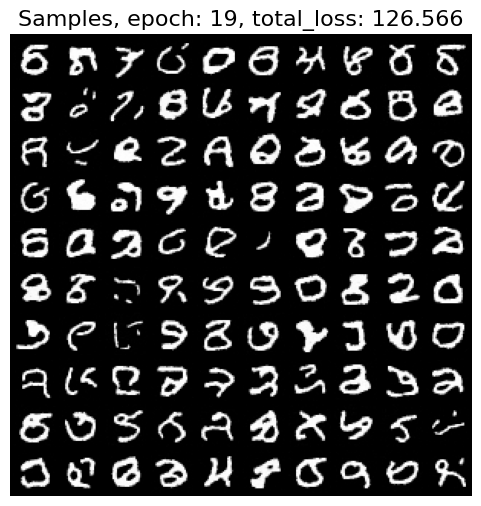

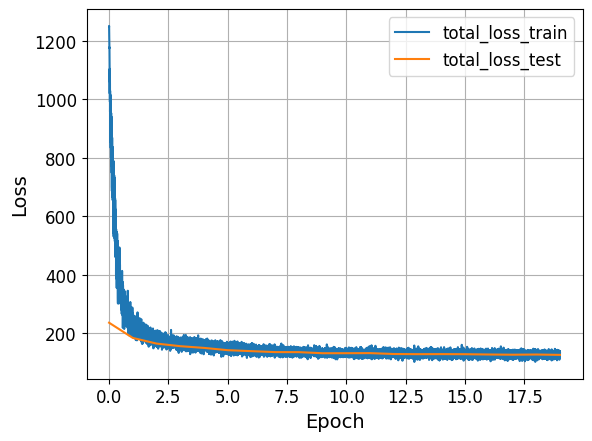

End of the training


In [141]:
# ====
# your code
# choose these parameters
BATCH_SIZE = 64  # any adequate value
LR = 1e-4  # <= 1e-3
EPOCHS = 20  # <= 30
N_FILTERS = 32  # < 128
DIM_MULTS = (1, 2, 4)  # < 8
# ====

train_loader = data.DataLoader(2 * train_data - 1, batch_size=BATCH_SIZE, shuffle=True)
test_loader = data.DataLoader(2 * test_data - 1, batch_size=BATCH_SIZE, shuffle=True)

score_model = Unet(
    dim=N_FILTERS, channels=1, dim_mults=DIM_MULTS, num_embeddings=len(SIGMAS)
)

ncsn = torch.compile(NoiseConditionedScoreNetwork(
    score_model=score_model,
    input_shape=(1, 28, 28),
    sigmas=SIGMAS,
))

# ====
# your code
# choose any optimizer/scheduler as you want
optimizer = torch.optim.Adam(ncsn.parameters(), lr=LR)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.95)
# ====

# train
dgm_utils.train_model(
    ncsn,
    train_loader,
    test_loader,
    optimizer=optimizer,
    scheduler=scheduler,
    epochs=EPOCHS,
    device=DEVICE,
)

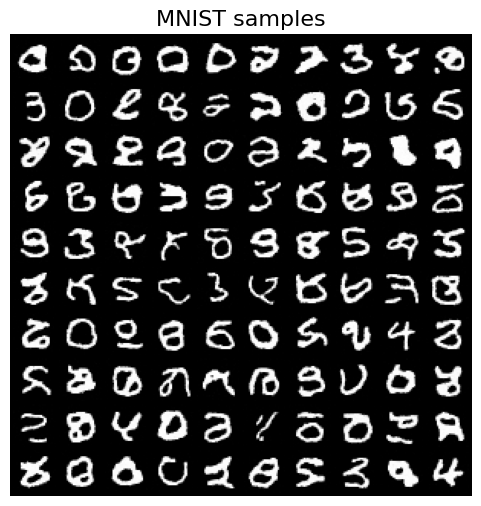

In [146]:
# ====
# your code
# choose these parameters
NUM_STEPS = 100
EPS = 0.11
# ====

samples = ncsn.sample(100, num_steps=NUM_STEPS, eps=EPS).cpu()
samples_norm = torch.clamp(samples, 0.0, 1.0)
dgm_utils.show_samples(samples_norm, "MNIST samples")